In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel('Concrete_Data.xls')
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [26]:
#rename the columns
df.columns = ['cement', 'BFslag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'CCstrength']
df.head()

,cement,BFslag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,CCstrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [27]:
df.isnull().sum()

cement              0
BFslag              0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
CCstrength          0
dtype: int64

In [28]:
df.shape

(1030, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   BFslag            1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   CCstrength        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [30]:
df.describe()

,cement,BFslag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,CCstrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


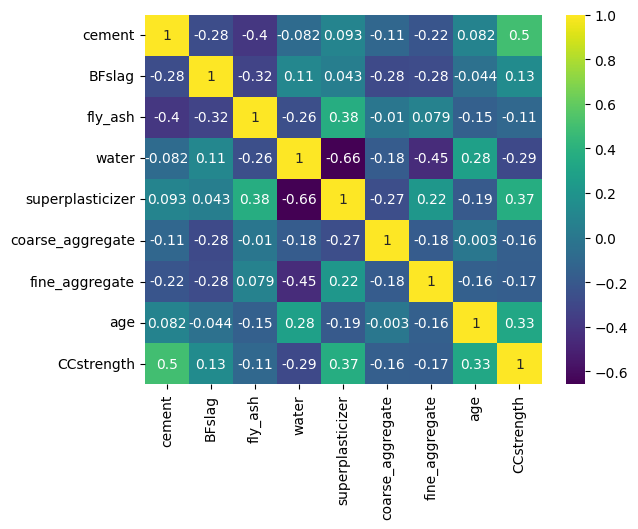

In [31]:
#check the correlation between the features
df.corr()
#plotting the heatmap of the correlation matrix
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

As you can see in this case,columns like fly_ash, water, coarse_aggegate and fine_aggregate has negative relationship with  the target variable.

In [123]:
df = df.drop(['fine_aggregate','water'], axis=1)

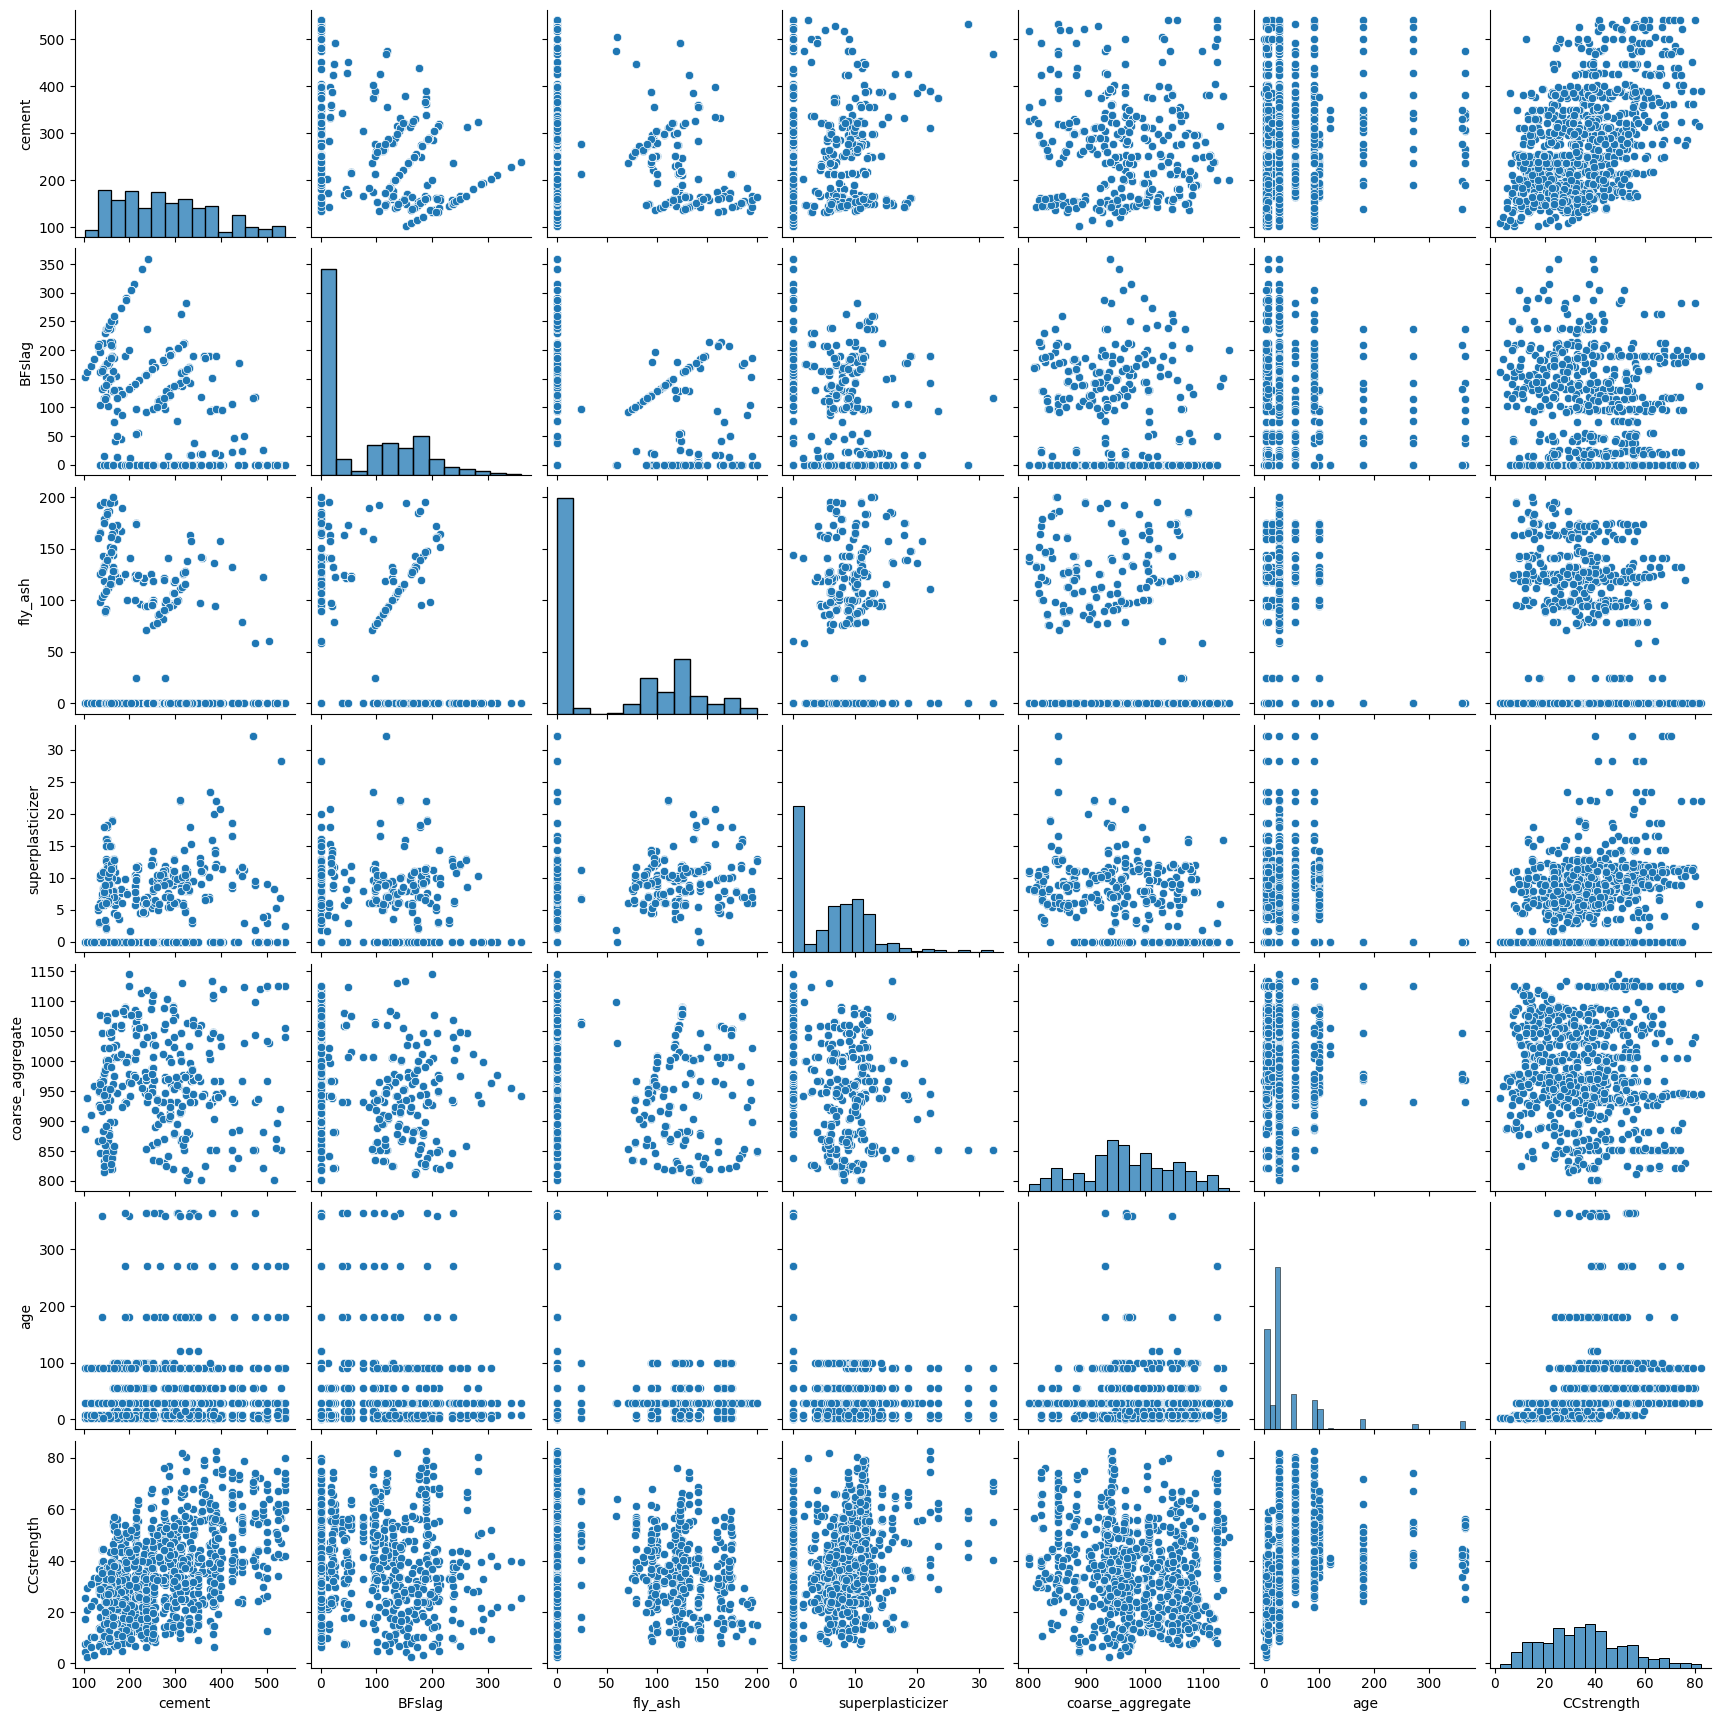

In [124]:
#plot some visuals using the initial data
import seaborn as sns
sns.pairplot(df)
plt.show()

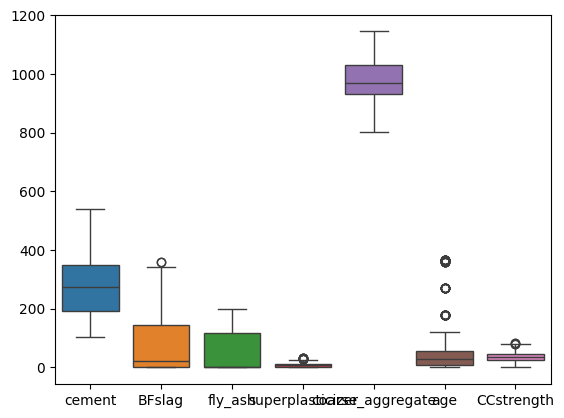

In [125]:
#identify outliers
import seaborn as sns
sns.boxplot(data=df)
plt.show()

In [126]:
#remove outliers using z-score method
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered = df[(abs_z_scores < 3).all(axis=1)]
print(len(filtered))
print(len(df))

983
1030


In [127]:
filtered.shape

(983, 7)

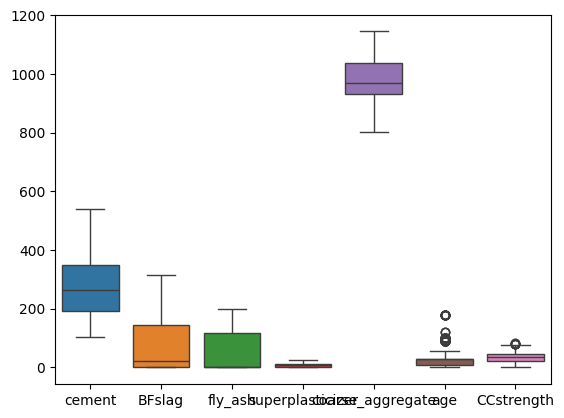

In [128]:
#check the outliers again
import seaborn as sns
filtered = df[(abs_z_scores < 3).all(axis=1)]  # Define 'filtered' variable
sns.boxplot(data=filtered)
plt.show()

In [129]:
#import libraries for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [130]:
#split the data into target and feature
X = filtered.drop('CCstrength', axis=1)  # Features (excluding target variable)
y = filtered['CCstrength']                

In [131]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#print out some information about the datasets
print(X_train.shape)
print(X_test.shape)

(688, 6)
(295, 6)


In [132]:
#fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [133]:
#predictions on test model
y_pred = model.predict(X_test)
print('\nTest MSE:', mean_squared_error(y_test, y_pred))


Test MSE: 87.89769269705212


In [134]:
#model evaluation
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.6878338936736156
Test score: 0.6335804618704493


In [135]:
#print metrics
print('r2 score: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_squared_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred, squared=False))
print('Root Mean Squared Error: ', mean_absolute_error(y_test, y_pred))


r2 score:  0.6335804618704493
Mean Absolute Error:  87.89769269705212
Mean Squared Error:  9.375376936265129
Root Mean Squared Error:  7.150477479347061


C:\Users\dkout\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [136]:
#Print the coefficients and intercept
print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [0.1177467  0.09684132 0.06936575 0.88840567 0.02153841 0.20879368]
Intercept:  -42.17001503415726


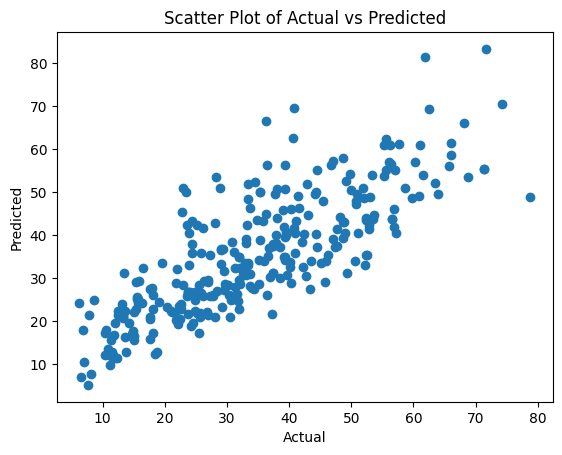

In [137]:
#plot the visuals
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter Plot of Actual vs Predicted")
plt.show()

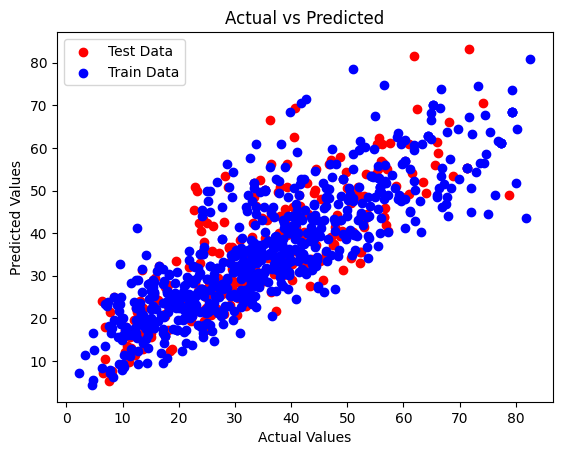

In [138]:
#plot the results as actual vs predicted by two colors
plt.scatter(y_test, y_pred, color='red')  # this is your test data
plt.scatter(y_train, model.predict(X_train), color='blue')  # this is your train data

#add legends and labels to the plot
plt.legend(["Test Data", "Train Data"], loc=0)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted')
plt.show()


In [139]:
df.head(2)

,cement,BFslag,fly_ash,superplasticizer,coarse_aggregate,age,CCstrength
0,540.0,0.0,0.0,2.5,1040.0,28,79.986111
1,540.0,0.0,0.0,2.5,1055.0,28,61.887366


In [144]:
#creating a new dataset to test the model on
new_data=[[540.0,0.0,0.0,2.5,1055.0,28]]

#predicting the output using the new dataset
prediction=model.predict(new_data)

#printing out the predicted output
print("Predicted Output: ", prediction)

Predicted Output:  [52.20346261]


C:\Users\dkout\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Try Different way